##### 1. Your views about the problem statement?    
    - The goal is to predict whether it will rain the next day or not, based on historical weather data from Sydney. The dataset includes features such as temperature, humidity, pressure, and previous rainfall data, which can be utilized to build predictive models.  

#####  2. What will be your approach to solving this task?    
    - Collecting the data and understanding the dataset.  
    - Data Preprocessing • Handle missing values  • Convert categorical variables to numeric 
    - Exploratory Data Analysis (EDA):  Analyze the dataset to identify patterns, correlations, and outliers with visualizations. 
    - Feature selection of variables.  
    - Choose several Classification models to train and evaluate, including Logistic Regression, Decision Tree Classifier and Ensemble Methods such as Random Forests, Bagging and Boosting. 
    - Split the data into training and testing sets. Train the models and evaluate their performance using metrics like accuracy, precision, recall and confusion matrix.

#####   3. What were the available ML model options you had to perform this task?    
    - There are several classification models to train and evaluate, like 'Logistic Regression', 'KNN', 'Decision Tree Classifier' and Ensemble Methods such as 'Random Forests', 'Bagging' and 'Boosting'.

#####    4. Which model’s performance is best and what could be the possible reason for that? 
    Based on the metrics provided, the best model is the Bagging Classifier. Here's why:
    
    Overall, Bagging Classifier achieved the highest accuracy of 82.93% among the models tested. This indicates that the ensemble method of bagging, which combines predictions from multiple models, effectively reduced variance and improved overall predictive performance.
    Bagging Classifier likely performed better due to its ability to aggregate predictions from multiple decision trees, which helps to mitigate the risk of overfitting that can occur with a single model.

    The precision and recall metrics indicate that while the models perform well in predicting non-rainy days (Class 0), there is room for improvement in predicting rainy days (Class 1). The recall for Class 1 is notably low across all models, indicating that many rainy days are being misclassified as non-rainy.
   
    Here's a brief explanation of other model's performance:

    Logistic Regression model has an accuracy of 0.8248, but the precision and recall for class 1 are relatively low.
    Random Forest Classifier model has a slightly lower accuracy than logistic regression, but the precision and recall for class 1 are slightly better.

##### 5. What steps can you take to improve this selected model’s performance even further?    
    - We can select the best-performing model based on the evaluation metrics adn identify ways to further improve the accuracy of the selected model by Hyperparameter tuning, Cross-Validation and Feature engineering.

## Exploratory data analysis (EDA)

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read the CSV file located at the specified file path into a pandas DataFrame object and store it in a variable.

df = pd.read_csv('C:/Users/Ananya/Documents/Jupyter_Notebook/sydney_rain prediction.csv')

In [3]:
df.head()          # pandas returns the first few rows of a DataFrame(by default 1st 5 rows)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-02-2008,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,02-02-2008,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,03-02-2008,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,04-02-2008,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,05-02-2008,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3337 non-null   object 
 1   Location      3337 non-null   object 
 2   MinTemp       3334 non-null   float64
 3   MaxTemp       3335 non-null   float64
 4   Rainfall      3331 non-null   float64
 5   Evaporation   3286 non-null   float64
 6   Sunshine      3321 non-null   float64
 7   Humidity9am   3323 non-null   float64
 8   Humidity3pm   3324 non-null   float64
 9   Pressure9am   3317 non-null   float64
 10  Pressure3pm   3318 non-null   float64
 11  Cloud9am      2771 non-null   float64
 12  Cloud3pm      2776 non-null   float64
 13  Temp9am       3333 non-null   float64
 14  Temp3pm       3333 non-null   float64
 15  RainToday     3331 non-null   object 
 16  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(4)
memory usage: 443.3+ KB


In [5]:
df = df.drop(columns=['Date', 'Location'])      # Dropping columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MinTemp       3334 non-null   float64
 1   MaxTemp       3335 non-null   float64
 2   Rainfall      3331 non-null   float64
 3   Evaporation   3286 non-null   float64
 4   Sunshine      3321 non-null   float64
 5   Humidity9am   3323 non-null   float64
 6   Humidity3pm   3324 non-null   float64
 7   Pressure9am   3317 non-null   float64
 8   Pressure3pm   3318 non-null   float64
 9   Cloud9am      2771 non-null   float64
 10  Cloud3pm      2776 non-null   float64
 11  Temp9am       3333 non-null   float64
 12  Temp3pm       3333 non-null   float64
 13  RainToday     3331 non-null   object 
 14  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(2)
memory usage: 391.2+ KB


In [7]:
# Checking missing values in the dataset

df.isna().sum()

MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
dtype: int64

In [8]:
#filling the missing values with mean/mode

df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode())

In [9]:
# Converting Categorical column into numerical by creating Dummy variables

df = pd.get_dummies(df, columns=['RainToday', 'RainTomorrow'], drop_first=True)
df = df.astype(int)

In [10]:
df.isna().sum()

MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday_Yes       0
RainTomorrow_Yes    0
dtype: int64

In [11]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,14.416242,22.553491,3.182799,4.814804,6.760563,68.228049,54.696434,1017.892119,1015.571471,4.150734,4.181900,17.371891,21.078514,0.259515,0.259215
std,4.552085,4.500556,9.803992,2.771988,3.760584,15.053675,16.261811,7.009097,7.017604,2.506417,2.410918,4.899514,4.315684,0.438434,0.438269
min,4.000000,11.000000,0.000000,0.000000,0.000000,19.000000,10.000000,986.000000,989.000000,0.000000,0.000000,6.000000,10.000000,0.000000,0.000000
25%,11.000000,19.000000,0.000000,3.000000,4.000000,58.000000,44.000000,1013.000000,1011.000000,2.000000,2.000000,13.000000,18.000000,0.000000,0.000000
50%,14.000000,22.000000,0.000000,4.000000,8.000000,69.000000,56.000000,1018.000000,1016.000000,4.000000,4.000000,18.000000,21.000000,0.000000,0.000000
75%,18.000000,26.000000,1.000000,7.000000,10.000000,80.000000,64.000000,1023.000000,1020.000000,7.000000,7.000000,21.000000,24.000000,1.000000,1.000000
max,27.000000,45.000000,119.000000,18.000000,13.000000,100.000000,99.000000,1039.000000,1036.000000,9.000000,8.000000,36.000000,44.000000,1.000000,1.000000


### Outlier Detection

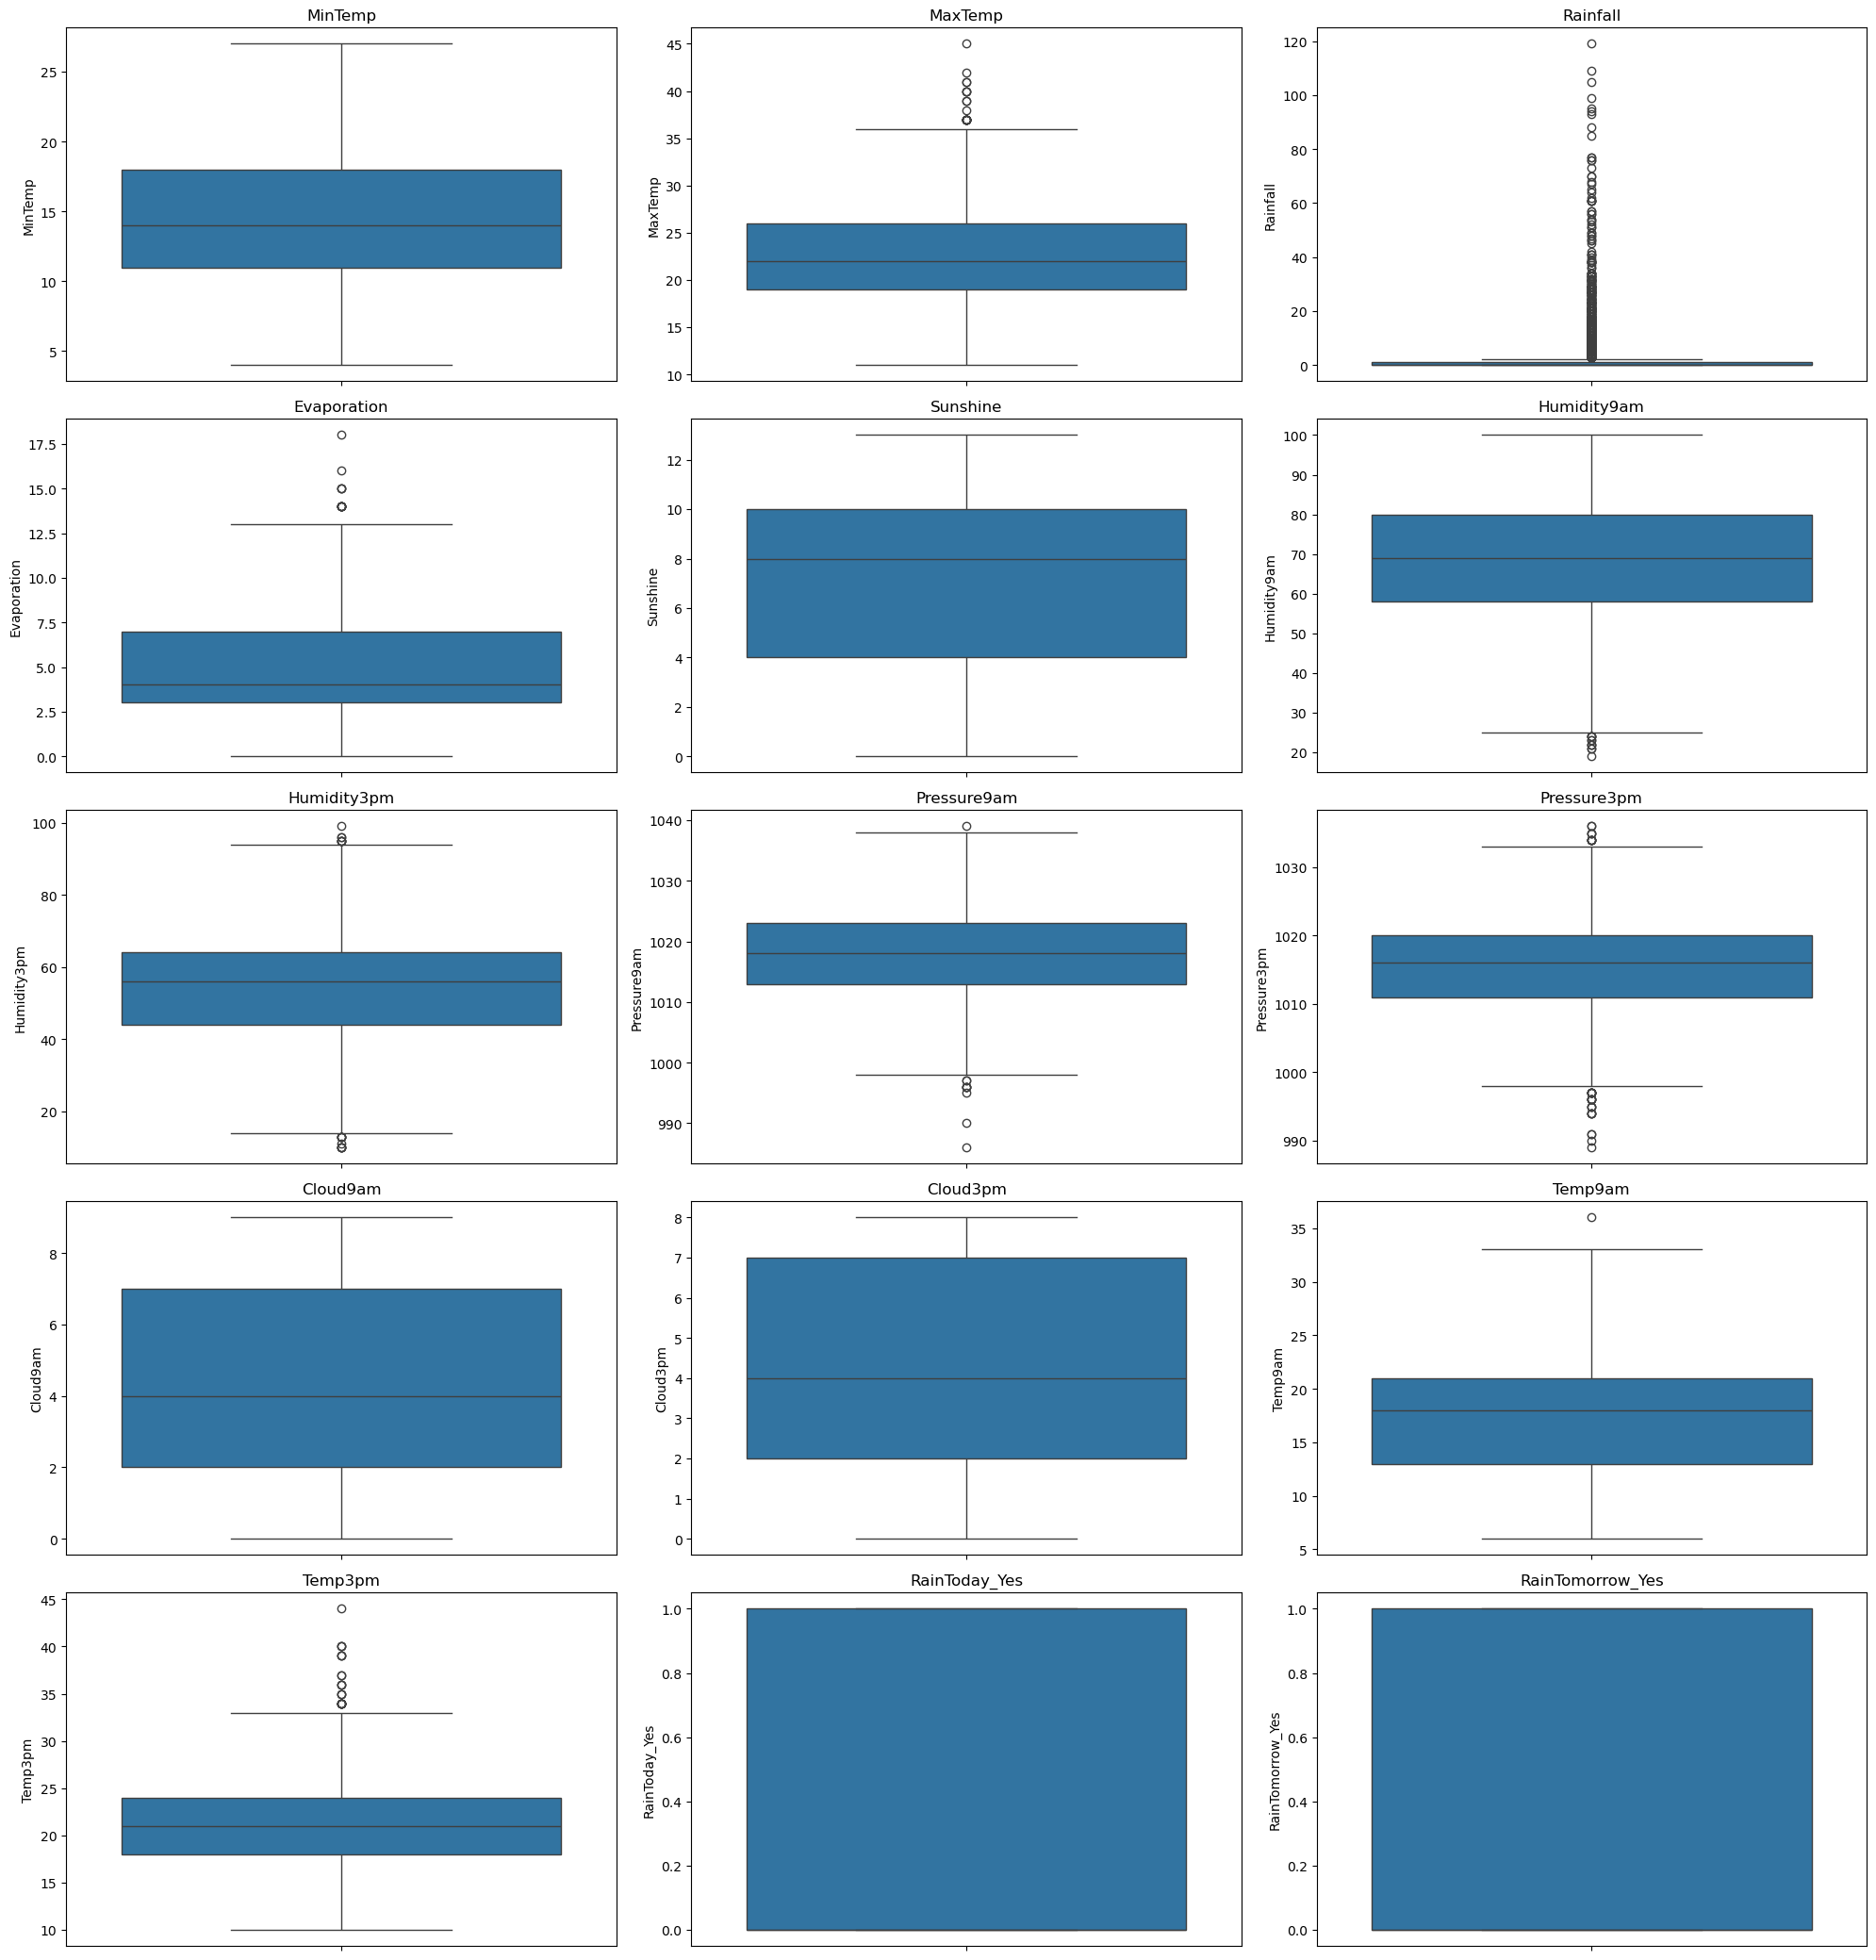

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the matplotlib figure
plt.figure(figsize=(20, 25))

# Plotting boxplots for each feature in the dataset
for i, column in enumerate(df.columns, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(data=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

### Handling Outliers

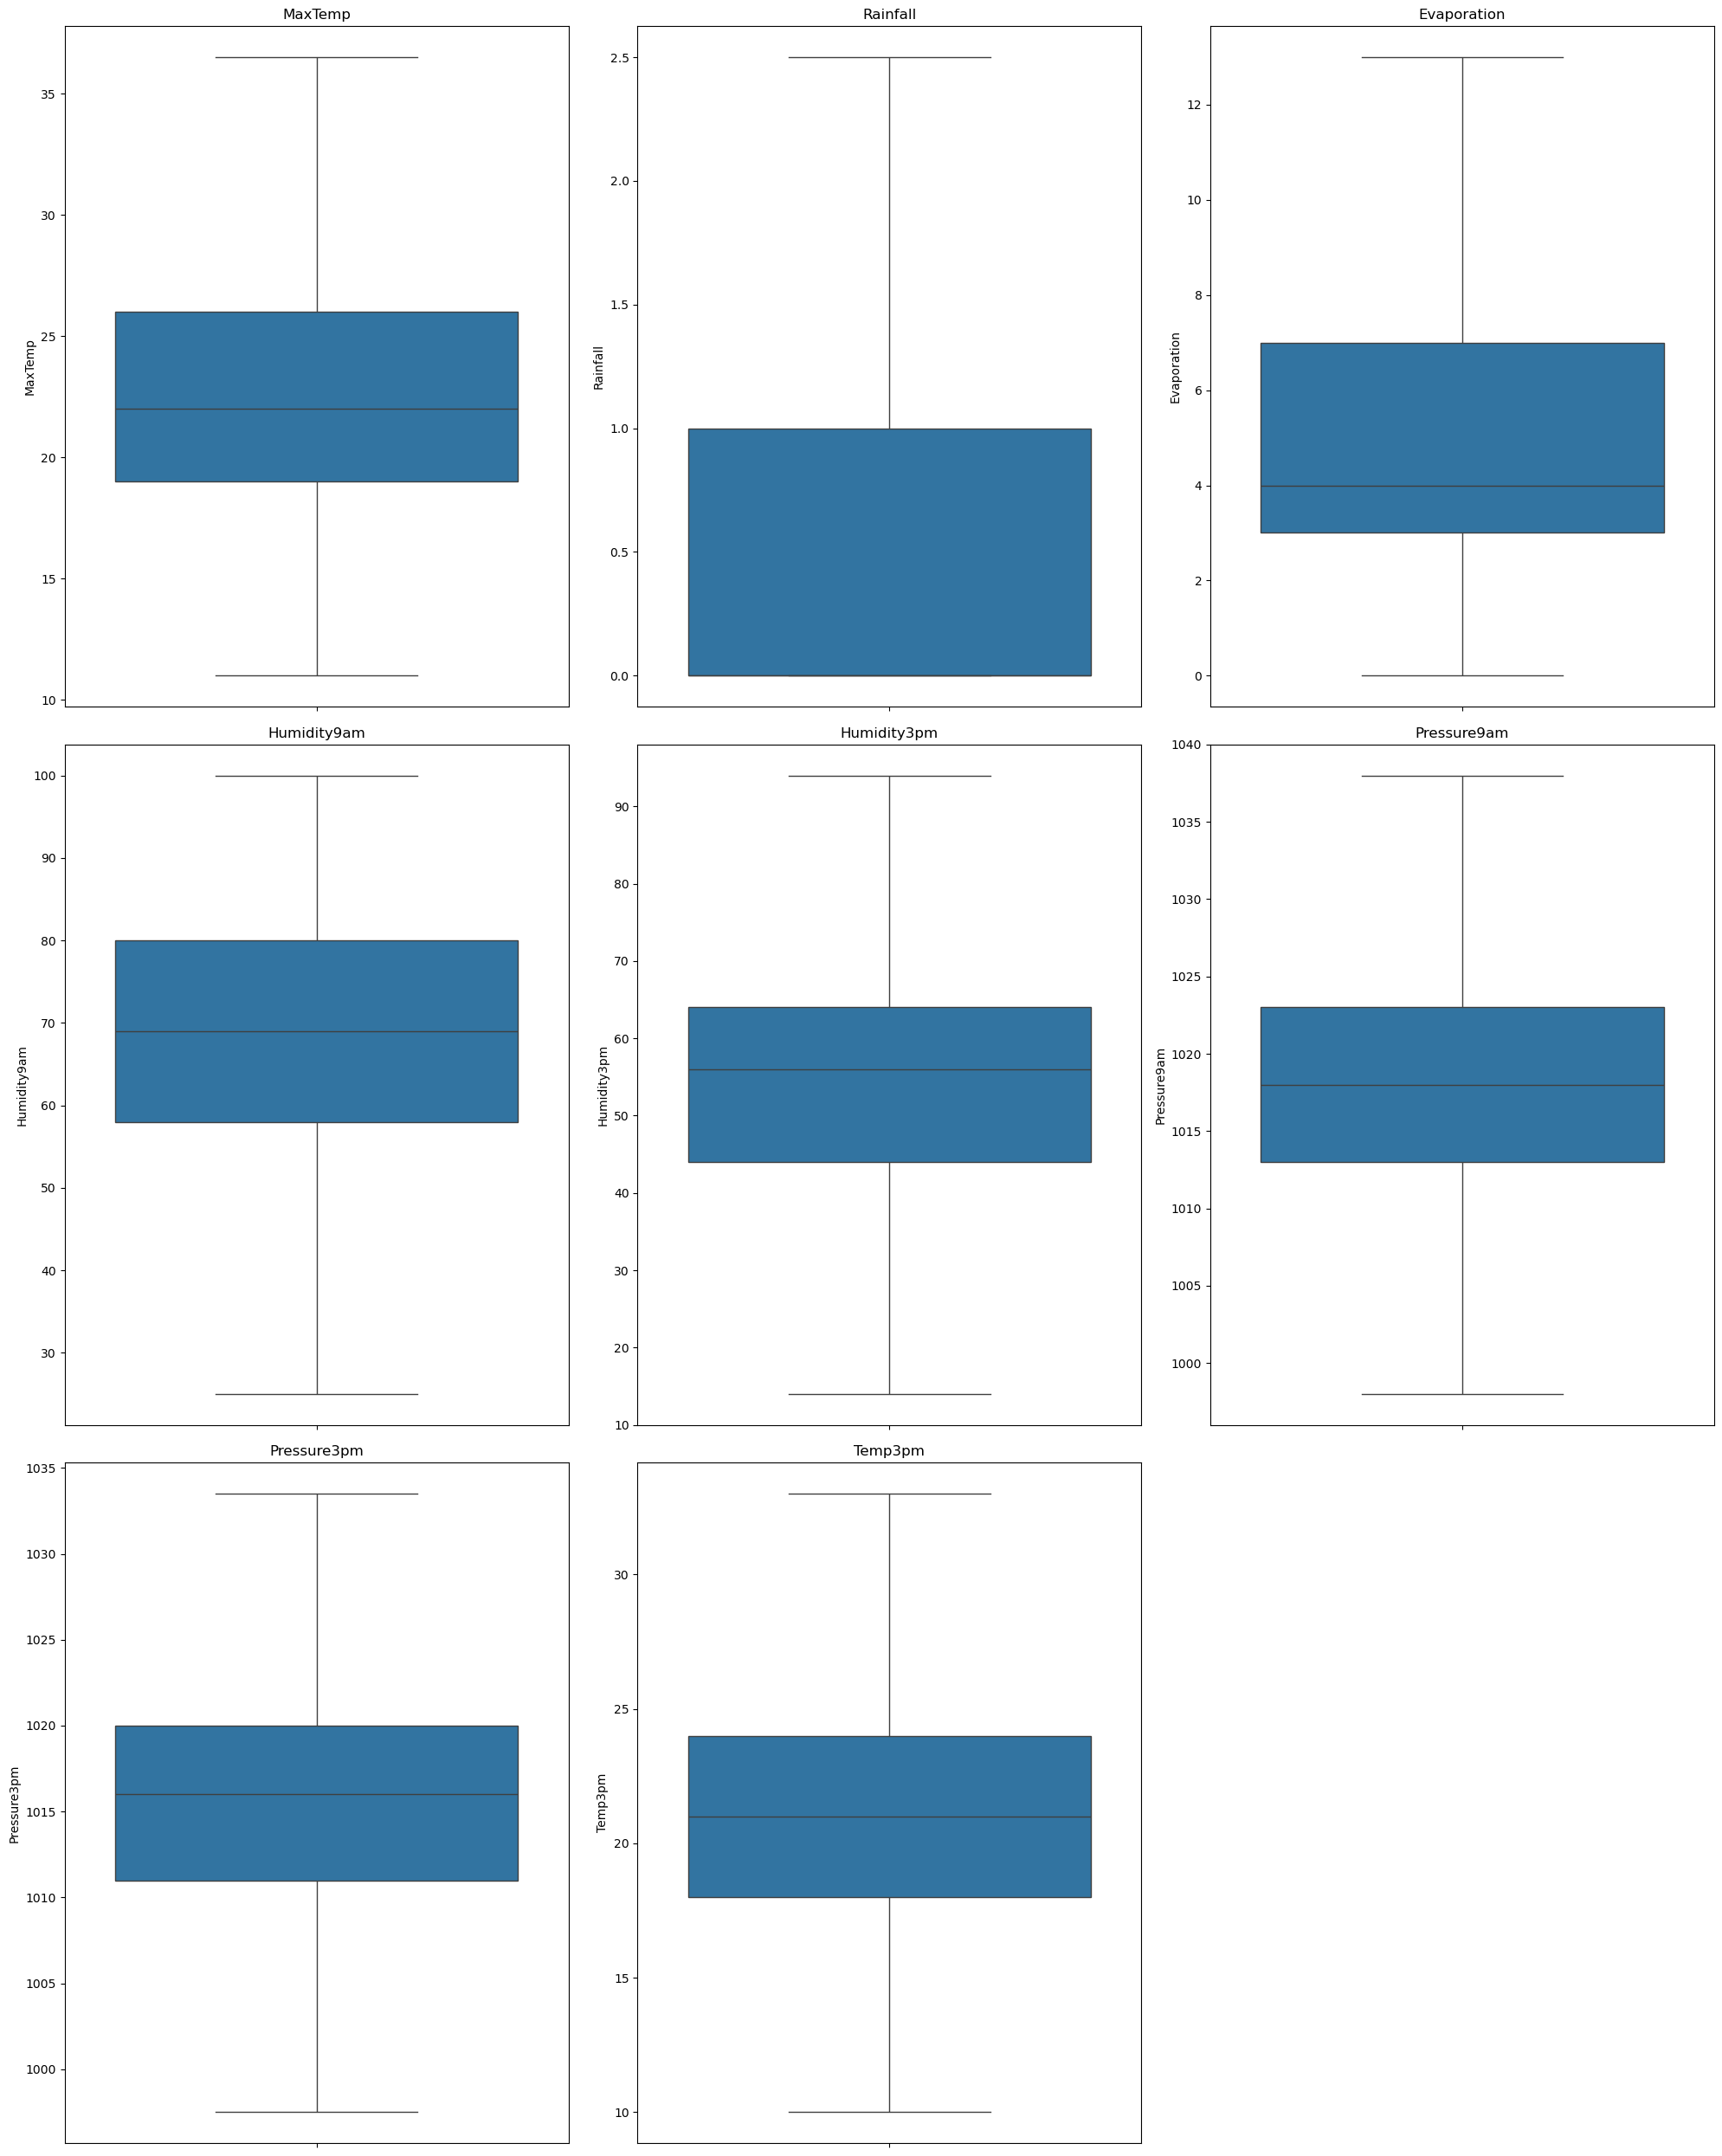

In [13]:
columns = ['MaxTemp', 'Rainfall', 'Evaporation', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp3pm']

# Replace outliers with the lower or upper bound for Previous CTC and CTC columns
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1       # Calculates the InterQuartile Range, which is the difference between the third and first quartiles.

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Check for outliers again
# Setting up the matplotlib figure
plt.figure(figsize=(20, 25))

# Plotting boxplots for each feature in the dataset
for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [14]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.00000,3337.000000,3337.000000
mean,14.416242,22.539706,0.603686,4.808211,6.760563,68.237339,54.700629,1017.901708,1015.586155,4.150734,4.181900,17.371891,21.05424,0.259515,0.259215
std,4.552085,4.450955,1.025401,2.749496,3.760584,15.025897,16.229414,6.975027,6.953532,2.506417,2.410918,4.899514,4.23193,0.438434,0.438269
min,4.000000,11.000000,0.000000,0.000000,0.000000,25.000000,14.000000,998.000000,997.500000,0.000000,0.000000,6.000000,10.00000,0.000000,0.000000
25%,11.000000,19.000000,0.000000,3.000000,4.000000,58.000000,44.000000,1013.000000,1011.000000,2.000000,2.000000,13.000000,18.00000,0.000000,0.000000
50%,14.000000,22.000000,0.000000,4.000000,8.000000,69.000000,56.000000,1018.000000,1016.000000,4.000000,4.000000,18.000000,21.00000,0.000000,0.000000
75%,18.000000,26.000000,1.000000,7.000000,10.000000,80.000000,64.000000,1023.000000,1020.000000,7.000000,7.000000,21.000000,24.00000,1.000000,1.000000
max,27.000000,36.500000,2.500000,13.000000,13.000000,100.000000,94.000000,1038.000000,1033.500000,9.000000,8.000000,36.000000,33.00000,1.000000,1.000000


### Correlation matrix

In [15]:
# Calculate the correlation matrix
corr_matrix = df.corr()

corr_matrix

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
MinTemp,1.000000,0.772363,0.019072,0.564829,-0.057496,0.051965,0.269252,-0.396205,-0.357809,0.233242,0.161734,0.935401,0.756814,0.017203,0.078575
MaxTemp,0.772363,1.000000,-0.181290,0.508478,0.327698,-0.184639,-0.146065,-0.388933,-0.422629,-0.087273,-0.101097,0.858328,0.955369,-0.187309,-0.150877
Rainfall,0.019072,-0.181290,1.000000,-0.230098,-0.364791,0.407530,0.345313,-0.008738,0.051445,0.320319,0.257977,-0.070804,-0.184907,0.959288,0.351728
Evaporation,0.564829,0.508478,-0.230098,1.000000,0.180579,-0.393072,-0.101515,-0.342121,-0.298195,-0.038954,-0.038328,0.602761,0.474764,-0.232232,-0.064952
Sunshine,-0.057496,0.327698,-0.364791,0.180579,1.000000,-0.489253,-0.578052,-0.048073,-0.098002,-0.656905,-0.672547,0.118930,0.346639,-0.366099,-0.518147
Humidity9am,0.051965,-0.184639,0.407530,-0.393072,-0.489253,1.000000,0.658034,0.263579,0.252217,0.421471,0.328877,-0.146349,-0.151439,0.401029,0.329362
Humidity3pm,0.269252,-0.146065,0.345313,-0.101515,-0.578052,0.658034,1.000000,0.153944,0.182328,0.451991,0.469046,0.130011,-0.202005,0.343140,0.471836
Pressure9am,-0.396205,-0.388933,-0.008738,-0.342121,-0.048073,0.263579,0.153944,1.000000,0.959225,-0.010435,-0.039044,-0.421481,-0.345889,0.000012,-0.032357
Pressure3pm,-0.357809,-0.422629,0.051445,-0.298195,-0.098002,0.252217,0.182328,0.959225,1.000000,0.020556,-0.001096,-0.405788,-0.390174,0.057853,0.011850
Cloud9am,0.233242,-0.087273,0.320319,-0.038954,-0.656905,0.421471,0.451991,-0.010435,0.020556,1.000000,0.609291,0.086630,-0.089933,0.315736,0.328448


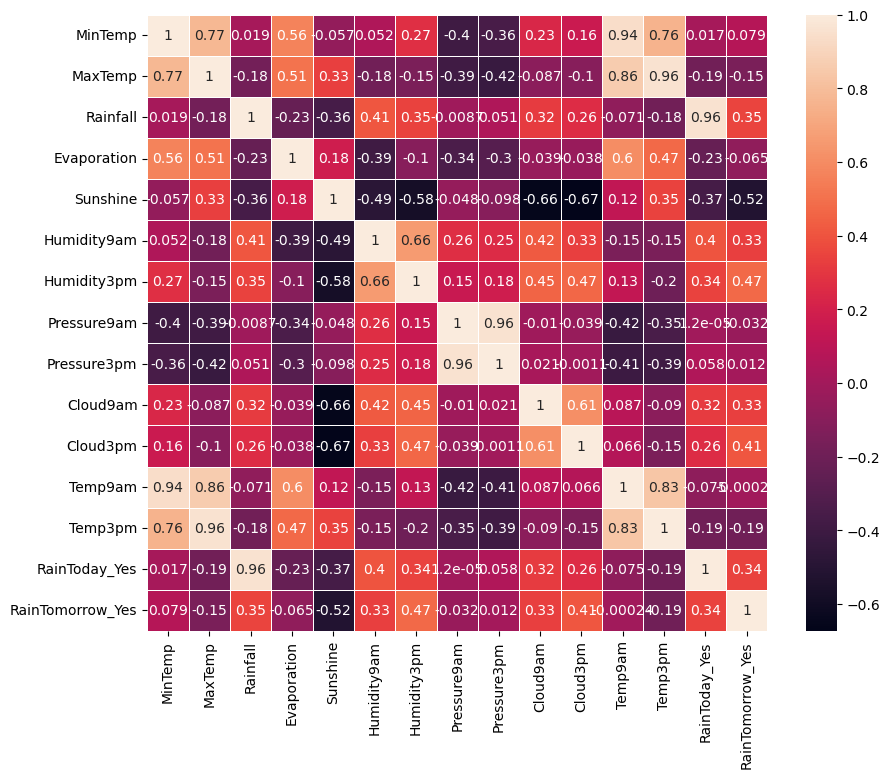

In [16]:
# Set the size of the figure
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5) 
plt.show() 

## Applying various Machine Learning Classification models

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [18]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df.drop('RainTomorrow_Yes', axis=1)
y = df['RainTomorrow_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2669, 14) (668, 14) (2669,) (668,)


#### LogisticRegression

In [19]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Find out coefficient and intercept
print("Coefficient:", model_lr.coef_)
print("Intercept:", model_lr.intercept_)

model_lr_predict = model_lr.predict(X_test)

# Evaluate the model using accuracy score, classification report, and confusion matrix
accuracy = accuracy_score(y_test, model_lr_predict)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, model_lr_predict))
print("Confusion Matrix:")
print(confusion_matrix(y_test, model_lr_predict))

Coefficient: [[-0.13438295  0.11580811  0.26411323  0.04695559 -0.21794794  0.00818705
   0.05639242 -0.09849208  0.09393551 -0.0922484   0.11880255  0.04583517
  -0.03906065  0.10152905]]
Intercept: [0.00134114]
Accuracy: 0.8248502994011976
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.88       484
           1       0.74      0.56      0.64       184

    accuracy                           0.82       668
   macro avg       0.79      0.74      0.76       668
weighted avg       0.82      0.82      0.82       668

Confusion Matrix:
[[448  36]
 [ 81 103]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### RandomForestClassifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model_rf.fit(X_train, y_train)

# Make predictions on the testing data
model_rf_predict = model_rf.predict(X_test)

# Evaluate the model using accuracy score, classification report, and confusion matrix
accuracy = accuracy_score(y_test, model_rf_predict)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, model_rf_predict))
print("Confusion Matrix:")
print(confusion_matrix(y_test, model_rf_predict))

Accuracy: 0.8233532934131736
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       484
           1       0.75      0.54      0.63       184

    accuracy                           0.82       668
   macro avg       0.79      0.74      0.76       668
weighted avg       0.82      0.82      0.81       668

Confusion Matrix:
[[450  34]
 [ 84 100]]


#### DecisionTreeClassifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn import tree

model_dt = DecisionTreeClassifier(max_depth=3)
model_dt.fit(X_train, y_train)

# Make predictions on the testing data
model_dt_predict = model_dt.predict(X_test)

# Evaluate the model using accuracy score, classification report, and confusion matrix
accuracy = accuracy_score(y_test, model_dt_predict)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, model_dt_predict))
print("Confusion Matrix:")
print(confusion_matrix(y_test, model_dt_predict))

Accuracy: 0.8083832335329342
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       484
           1       0.84      0.38      0.52       184

    accuracy                           0.81       668
   macro avg       0.82      0.67      0.70       668
weighted avg       0.81      0.81      0.78       668

Confusion Matrix:
[[471  13]
 [115  69]]


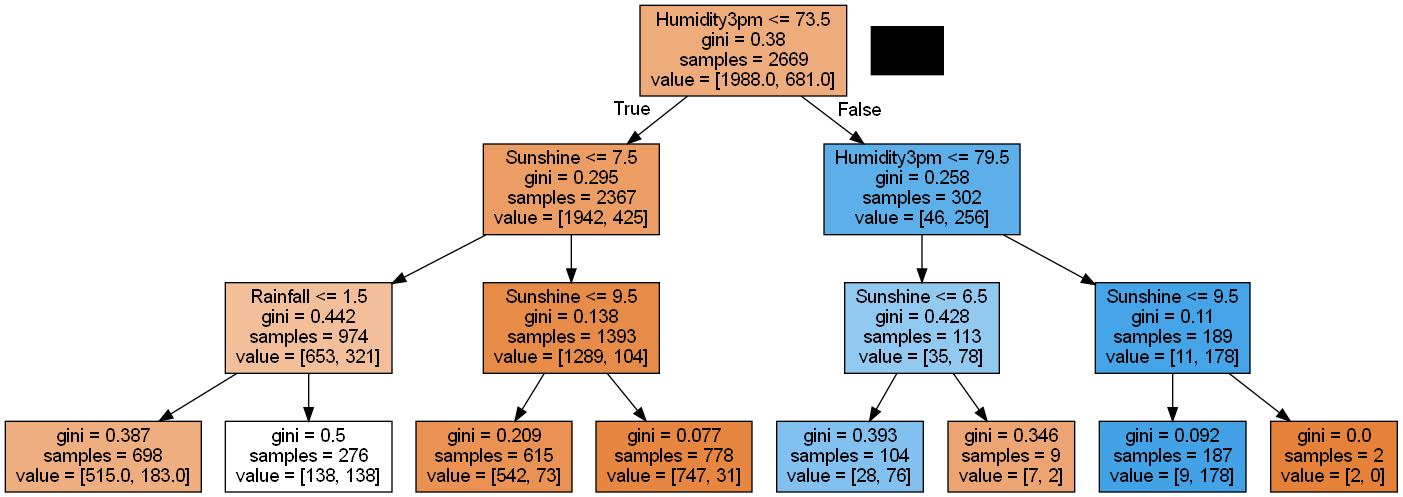

In [22]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(model_dt, 
                           out_file=None, 
                           feature_names=X_train.columns, 
                           filled=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

#### Bagging and Boosting techniquesr

In [23]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier

# Bagging with Random Forest
model_bagging1 = BaggingClassifier(estimator=RandomForestClassifier(n_estimators=100), n_estimators=10, random_state=42)
model_bagging1.fit(X_train, y_train)
model_bagging_predict1 = model_bagging1.predict(X_test)

# Evaluate the Bagging model
accuracy_bagging1 = accuracy_score(y_test, model_bagging_predict1)
print("Bagging1 Accuracy:", accuracy_bagging1)
print("Bagging1 Classification Report:")
print(classification_report(y_test, model_bagging_predict1))
print("Bagging1 Confusion Matrix:")
print(confusion_matrix(y_test, model_bagging_predict1))

# Bagging with Decision Tree
model_bagging2 = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), n_estimators=100, random_state=42)
model_bagging2.fit(X_train, y_train)
model_bagging_predict2 = model_bagging2.predict(X_test)

# Evaluate the Bagging model
accuracy_bagging2 = accuracy_score(y_test, model_bagging_predict2)
print("Bagging2 Accuracy:", accuracy_bagging2)
print("Bagging2 Classification Report:")
print(classification_report(y_test, model_bagging_predict2))
print("Bagging2 Confusion Matrix:")
print(confusion_matrix(y_test, model_bagging_predict2))

Bagging1 Accuracy: 0.8293413173652695
Bagging1 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       484
           1       0.77      0.55      0.64       184

    accuracy                           0.83       668
   macro avg       0.81      0.74      0.76       668
weighted avg       0.82      0.83      0.82       668

Bagging1 Confusion Matrix:
[[453  31]
 [ 83 101]]
Bagging2 Accuracy: 0.8248502994011976
Bagging2 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       484
           1       0.72      0.59      0.65       184

    accuracy                           0.82       668
   macro avg       0.79      0.75      0.77       668
weighted avg       0.82      0.82      0.82       668

Bagging2 Confusion Matrix:
[[442  42]
 [ 75 109]]


In [24]:
# Boosting
model_boosting = GradientBoostingClassifier(n_estimators=1000, max_depth=1, learning_rate=0.02, random_state=42)
model_boosting.fit(X_train, y_train)
model_boosting_predict = model_boosting.predict(X_test)

# Evaluate the Boosting model
accuracy_boosting = accuracy_score(y_test, model_boosting_predict)
print("Boosting Accuracy:", accuracy_boosting)
print("Boosting Classification Report:")
print(classification_report(y_test, model_boosting_predict))
print("Boosting Confusion Matrix:")
print(confusion_matrix(y_test, model_boosting_predict))

Boosting Accuracy: 0.8188622754491018
Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       484
           1       0.74      0.52      0.61       184

    accuracy                           0.82       668
   macro avg       0.79      0.73      0.75       668
weighted avg       0.81      0.82      0.81       668

Boosting Confusion Matrix:
[[451  33]
 [ 88  96]]
